In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
# %
iris = datasets.load_iris() 
print(type(iris), dir(iris))

X = iris.get('data')
y = iris.get('target')

X = X[y<2,:2]
y = y[y<2]

y[y==0] = -1

plt.scatter(X[y==-1,0],X[y==-1,1],color='red')
plt.scatter(X[y==1,0],X[y==1,1],color='blue')
plt.show()

<class 'sklearn.utils.Bunch'> ['DESCR', 'data', 'feature_names', 'target', 'target_names']


<Figure size 640x480 with 1 Axes>

In [2]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standerd = standardScaler.transform(X)
X =X_standerd
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [3]:
y==1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

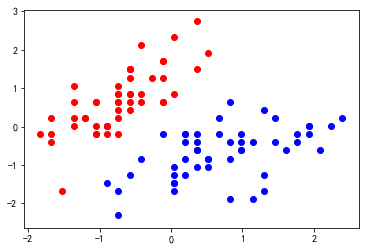

In [4]:
plt.scatter(X_standerd[y==-1,0],X_standerd[y==-1,1],color='red')
plt.scatter(X_standerd[y==1,0],X_standerd[y==1,1],color='blue')
plt.show()

In [5]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import copy
from time import sleep
import random

In [6]:
from math import exp

def kernel(data, sigma):
    kernelData = []
    N = len(data[0]) 
    print(N)
    for x in data:
        e_data = []
        for n in range(N):
            e_data_i = 1
            for xi in x:
                e_data_i *= f(xi,sigma,n)
            e_data.append(e_data_i)
        kernelData.append(e_data)
    return kernelData

In [7]:
def prediction(test, alphas):
    x = np.mat(test)
#     x = np.concatenate((np.ones((test.shape[0], 1)), test), axis=1)
    result = []

    for i in x:
        if np.dot(i, alphas) > 0:
            result.append(1)
        else:
            result.append(-1)

    return result
def SVM(X_train, y_train, learning_rate=0.01, max_iter=100):

    # 转化为numpy的mat存储
    data_x = np.mat(X_train)
#     data_x = np.concatenate((np.ones((data_matrix.shape[0], 1)), data_matrix), axis=1)
    label_mat = np.mat(y_train).transpose()
    m, n = np.shape(data_x)
    # 初始化alpha，设为0
    w = np.zeros((n, 1))

    w_history = [w]


    # 初始化迭代次数
    iter_num = 1
    # 最多迭代max_iter次
    while iter_num <= max_iter:
#         for i in range(m):## 可以改成随机梯度下降
        i = np.random.randint(0,m)
        # 计算预测值
        y = float(np.dot(data_x[i], w))

        if 1-label_mat[i]*y >= 0:
            w = (1.0 - 1.0 / iter_num) * w + learning_rate * (label_mat[i] * data_x[i]).T
        else:
            w = (1.0 - 1.0 / iter_num) * w

        w_history.append(w)

        iter_num += 1
    return w

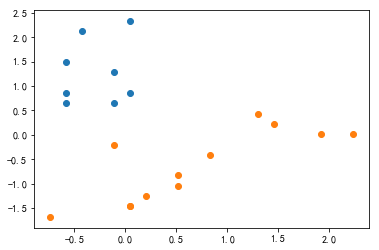

In [12]:

w = SVM(X_train,y_train)
y_pre = np.array(prediction(X_test,w))
plt.scatter(np.array(X_test)[y_pre==-1,0],np.array(X_test)[y_pre==-1,1])
plt.scatter(np.array(X_test)[y_pre==1,0],np.array(X_test)[y_pre==1,1])

# plt.scatter(np.array(X_train)[y_train==-1,0],np.array(X_train)[y_train==-1,1],c = "red",marker='+')
# plt.scatter(np.array(X_train)[y_train==1,0],np.array(X_train)[y_train==1,1],c = "blue",marker='+')

# x = np.linspace(-2,3,50)
# yy = -w[0,0] *x / w[1,0] 
# plt.plot(x,yy)
plt.show()

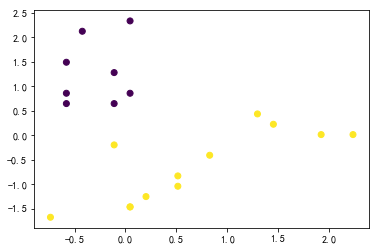

In [9]:
plt.scatter(np.array(X_test)[:,0],np.array(X_test)[:,1],c = y_test)
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pre,y_test))

1.0
